# Анализ постов Instagram. Часть 3 – Анализ пересечения хештегов

В качестве набора данных используется датасет, выгруженный в период с апреля по май 2020, по выявленному набору хештегов на тему акции «Бессметрный полк».    

## Анализ пересечения хештегов

На предыдущем шаге мы выделили теги в отдельную колонку `tags`. Далее, сделаем обработку полученного массива и поймем, как выделенные теги пересекаются друг с другом: проведем анализ частотности наличия пары тегов в одном посте.  

In [11]:
import numpy as np
import pandas as pd

In [13]:
filename = 'my_polk_mln'

Для считывания данных создадим вспомогательный атрибут `tag_convertor`, указывающий на способ обработки входящей колонки `tags`.

In [ ]:
tag_convertor = {'tags': lambda x: x.strip('[]').replace('\'', '').split(', ') if x and len(x) > 0 else np.nan}

In [15]:
df_ = pd.read_csv(f"../../data/{filename}.csv", engine='python', index_col=0)
# df_ = pd.read_csv(f"../../data/{filename}.csv", engine='python', index_col=0, converters=tag_convertor)

In [112]:
df__ = df_[['owner_id', 'post_url', 'display_url', 'published', 'caption', 'likes_count', 'comments_count', 'is_video', 'tags']]

### Предобработка 
Выделим только те данные, с которыми будем работать, а именно `id`, `tags`. Удалим пустые строки `caption` и `tags`.

In [113]:
df = df__.dropna(subset=['caption', 'tags'])
df = df[['post_url', 'display_url', 'published', 'likes_count', 'comments_count', 'caption', 'is_video', 'tags']]
df.head()

,post_url,display_url,published,likes_count,comments_count,caption,tags
id,,,,,,,
2303616061775464820,https://www.instagram.com/p/B_4FpplAsl0/,https://instagram.fhel5-1.fna.fbcdn.net/v/t51.2885-15/e35/96405351_1623915904438485_6963038115869957747_n.jpg?_nc_ht=instagram.fhel5-1.fna.fbcdn.net&_nc_cat=109&_nc_ohc=bnbSxn_m3D8AX-oPE8X&oh=abd867ab2ef3335c80674ee243c819a5&oe=5EE89294,2020-05-07 06:20:55+00,54,0,Блохин Василий Васильевич 1911г рождения. Пробал без вести 1941г#бесмертныйполк🙏,{бесмертныйполк}
2305119399719574714,https://www.instagram.com/p/B_9beGJJZy6/,https://instagram.fhel5-1.fna.fbcdn.net/v/t51.2885-15/e35/95892216_249867769585535_163872537262013120_n.jpg?_nc_ht=instagram.fhel5-1.fna.fbcdn.net&_nc_cat=111&_nc_ohc=H1fzr_XwRVIAX_zfDgJ&oh=c70ecea2ba35f8edd602a6d4e361b637&oe=5EE5AB99,2020-05-09 08:07:47+00,55,3,"Зайцев Борис Иванович, мой пра-дедушка, участник боевых действий в составе Кантемировской дивизии,освобождал город Сталинград, дошел до Праги. В боях под Сталинградом был ранен. Награждён боевыми наградами, среди них медаль за Отечество, медаль за освобождение Сталинграда! Спасибо🙏#бесмертныйполк🙏",{бесмертныйполк}
2302983163475195567,https://www.instagram.com/p/B_11vxGpPav/,https://instagram.fhel5-1.fna.fbcdn.net/v/t51.2885-15/e35/p1080x1080/95789322_2574763182738420_2982563137916280231_n.jpg?_nc_ht=instagram.fhel5-1.fna.fbcdn.net&_nc_cat=100&_nc_ohc=9-va5IiMk48AX-l71aB&oh=d0da1d676dbe6b7af76f87edd3629d27&oe=5EE86FCC,2020-05-06 09:23:28+00,43,1,"Мой дед Вавилин Егор Ильич 02.11.1920 года рождения воевал минометчиком 82 мм на полуострове Рыбачий в 40 километрах от границы, до 1942 года в 135 стр. полку с присвоенным званием сержант. \nВ декабре 1942 года направлен на курсы м. лейтенантов в г. Вологда. В апреле 1943 года с присвоенным званием лейтенант направлен командиром 3 стрелкового взвода в Тульскую область г. Ефремово . В орловской области 19 июля 1943 года получил ранение в ногу и был комиссован и уволен в запас из госпиталя в г. Горьком где сделано фото форму для фотографии одолжил у товарища. \nВ последствии был награждён Орденом Красного знамени нашли приказ о награждении за участие в боях на полуострове Рыбачий. И орденом Отечественной войны 2 ст. #бесмертныйполк2020 #бесмертныйполкпермь","{бесмертныйполк2020,бесмертныйполкпермь}"
2304720892040880707,https://www.instagram.com/p/B_8A3C8hKJD/,https://instagram.fhel5-1.fna.fbcdn.net/v/t51.2885-15/e35/s1080x1080/96420783_239092707434696_1283599358050362129_n.jpg?_nc_ht=instagram.fhel5-1.fna.fbcdn.net&_nc_cat=108&_nc_ohc=3gRG39YZTaMAX8nMq-a&oh=6747d4868f293c490144858df57f72e7&oe=5EE7194D,2020-05-08 18:56:01+00,47,0,"На этом фото два моих прадеда, благодаря которым и не только им есть мы. Один из них Зайшлый Пантилимон о котором ни чего не известно, кроме того, что 1942 году их поезд попал в оккупацию под Ростовом и прадед считается пропавшим без вести. Второй прадед по числу и значимости наград мог стать героем советского союза, он был старшим сержантом саперное группы и в годы войны спас не одну тысячу жизней ликвидирую бомбы врага. Он прошёл огромный путь и дошёл до Польше где и был удит, до победы он не дожил 8 месяцев. Похоронен он в селе Винер это в Польше. Их подвиг бесценен как и память о них. Ценой собственных жизней они дали жизнь будущую, низкий им поклон и память. #победа2020#75летпобеды#безмертныйполк","{победа2020,75летпобеды,безмертныйполк}"
2305072350833648291,https://www.instagram.com/p/B_9QxcdA6Kj/,https://instagram.fhel5-1.fna.fbcdn.net/v/t51.2885-15/e35/96406168_721974428559835_5728077900991401059_n.jpg?_nc_ht=instagram.fhel5-1.fna.fbcdn.net&_nc_cat=107&_nc_ohc=43VYM3BjexcAX8YwdiB&oh=d5fb464f16f0c08344a880b78a03543e&oe=5EE93A00,2020-05-09 06:34:19+00,84,0,"Спасибо прадедам и моему дедушке за Победу) за мирное небо за головой) Мой дедушка не любил вспоминать это время...для него как сильного человека,этот праздник был со слезами на глазах...я даже не могу представить что пришлось пережить людям во время войны...пусть никто и никог

In [124]:
df.tags = df.tags.apply(lambda x: x.strip('{}').replace('\'', '').split(',') if len(x) > 0 else np.nan)

In [26]:
df.head()

,display_url,published,likes_count,comments_count,caption,tags,top_tags
id,,,,,,,
2303616061775464820,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-07 06:20:55+00,54,0,Блохин Василий Васильевич 1911г рождения. Проб...,[бесмертныйполк],[]
2305119399719574714,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-09 08:07:47+00,55,3,"Зайцев Борис Иванович, мой пра-дедушка, участн...",[бесмертныйполк],[]
2302983163475195567,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-06 09:23:28+00,43,1,Мой дед Вавилин Егор Ильич 02.11.1920 года ро...,"[бесмертныйполк2020, бесмертныйполкпермь]",[]
2304720892040880707,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-08 18:56:01+00,47,0,"На этом фото два моих прадеда, благодаря котор...","[победа2020, 75летпобеды, безмертныйполк]",[]
2305072350833648291,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-09 06:34:19+00,84,0,Спасибо прадедам и моему дедушке за Победу) за...,"[знатьчтобыпомнили, знатьчтобыжить, безмертный...",[]


Соберем все теги в один список `flattened_tags_df` и эмпирически подберем минимальное число упоминаний тегов, тем самым выберем самые популярные среди них.

In [28]:
flattened_tags = pd.Series([tag for tag_list in df.tags for tag in tag_list])

In [30]:
flattened_tags_counts = flattened_tags.value_counts()
flattened_tags_df = pd.DataFrame(flattened_tags_counts, columns=['count'])

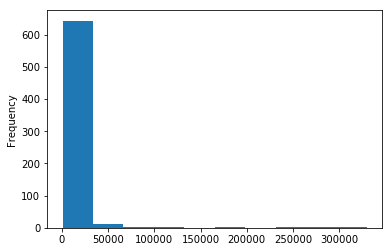

In [38]:
flattened_tags_counts.loc[flattened_tags_counts > 1000].plot(kind='hist')

Отсечение в > 1000 упоминаний не подходит, так как таких тегов много (больше 100). 

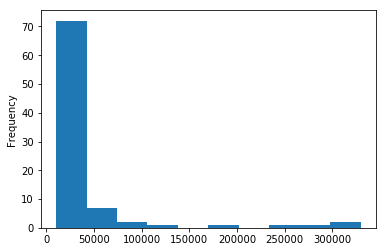

In [39]:
flattened_tags_counts.loc[flattened_tags_counts > 10000].plot(kind='hist')

10000 – выглядит более оптимальным числом, так как дает на выходе около 50 тегов. Создадим переменную `min_count` со значением 10000.

In [40]:
min_count = 10000

In [41]:
top_tags_set = set(flattened_tags_counts.loc[flattened_tags_counts > min_count].index)

In [42]:
len(top_tags_set)

87

87 – количество тегов, упоминаемых более 10000 раз.

In [43]:
top_tags_set

{'1941',
 '1945',
 '75летвеликойпобеды',
 '75летиепобеды',
 '75летпобеды',
 '9',
 '9мая',
 '9мая1945',
 '9мая2019',
 '9мая2020',
 '9маяденьпобеды',
 'polk',
 'repost',
 'russia',
 'victoryday',
 'армия',
 'бесмертныйполк',
 'бессмертныи',
 'бессмертный',
 'бессмертныйполк',
 'бессмертныйполк2020',
 'бессмертныйполкдома',
 'бессмертныйполконлайн',
 'бессмертныйполкроссии',
 'бессмертныйполктатарстан',
 'великаяотечественнаявойна',
 'великаяпобеда',
 'весна',
 'ветераны',
 'вечнаяпамять',
 'вместегордимся',
 'вов',
 'военныепесни',
 'война',
 'волонтерыпобеды',
 'георгиевскаялента',
 'георгиевскаяленточка',
 'годпамятииславы',
 'гордимся',
 'гордостьроссии',
 'деньпобеды',
 'деньпобеды2019',
 'деньпобеды2020',
 'знатьчтобыпомнить',
 'май',
 'мир',
 'москва',
 'мывместе',
 'мывсеравноскажемспасибо',
 'мыгордимся',
 'мыпомним',
 'мыпомниммыгордимся',
 'наследникипобеды',
 'нашапобеда',
 'никогданезабуду',
 'никтонезабыт',
 'никтонезабытничтонезабыто',
 'окна_победы',
 'окнапобеды',
 'памят

In [ ]:
# В множество тегов попали такие слова, как: `#ауе`, `#ауежизньворам`, `#базарунет`, `#бандит` и другие «блатные» понятия. Пока что оставим их, посмотрим как они коррелируют с тематическими тегами. 

В рабочий датасет `df` добавим колонку `top_tags`, в которой укажем теги из множества `top_tags_set` для каждого поста.

In [44]:
df['top_tags'] = df.tags.apply(lambda x: [tag for tag in x if tag in top_tags_set]); df.head()

,display_url,published,likes_count,comments_count,caption,tags,top_tags
id,,,,,,,
2303616061775464820,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-07 06:20:55+00,54,0,Блохин Василий Васильевич 1911г рождения. Проб...,[бесмертныйполк],[бесмертныйполк]
2305119399719574714,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-09 08:07:47+00,55,3,"Зайцев Борис Иванович, мой пра-дедушка, участн...",[бесмертныйполк],[бесмертныйполк]
2302983163475195567,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-06 09:23:28+00,43,1,Мой дед Вавилин Егор Ильич 02.11.1920 года ро...,"[бесмертныйполк2020, бесмертныйполкпермь]",[]
2304720892040880707,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-08 18:56:01+00,47,0,"На этом фото два моих прадеда, благодаря котор...","[победа2020, 75летпобеды, безмертныйполк]",[75летпобеды]
2305072350833648291,https://instagram.fhel5-1.fna.fbcdn.net/v/t51....,2020-05-09 06:34:19+00,84,0,Спасибо прадедам и моему дедушке за Победу) за...,"[знатьчтобыпомнили, знатьчтобыжить, безмертный...",[]


Выделим только те посты, в которых есть топовые теги.

In [45]:
df_top_tags = df.loc[df.top_tags.apply(lambda x: x !=[])]

In [46]:
df_top_tags.shape[0] / df.shape[0]

0.971251312913674

~97% постов содержат в себе топовые теги.

### Создание матрицы пересечения 
Создадим новый датафрейм `tag_vector_df`, в который запишем топовые теги.

In [47]:
tag_vector_df = df_top_tags.loc[:, ['top_tags']]; tag_vector_df.head()

,top_tags
id,
2303616061775464820,[бесмертныйполк]
2305119399719574714,[бесмертныйполк]
2304720892040880707,[75летпобеды]
2305107864828112422,"[сднемпобеды, 9мая]"
2305320253696999679,"[9мая, деньпобеды]"


Далее, для каждого топового тега создадим колонку в `tag_vector_df` и укажем его наличие в текущем посте.

In [48]:
for tag in sorted(top_tags_set):
    tag_vector_df[f"{tag}"] = tag_vector_df.top_tags.apply(lambda x: bool(tag in x))

In [49]:
tag_vector_df.shape

(971870, 88)

В итоге получится логическая матрица 971870 x 88. Запишем ее в переменную `tag_vector_matrix`.

In [50]:
tag_vector_matrix = tag_vector_df.drop(columns=['top_tags']); tag_vector_matrix.head()

,1941,1945,75летвеликойпобеды,75летиепобеды,75летпобеды,9,9мая,9мая1945,9мая2019,9мая2020,...,спасибо,спасибовам,спасибодедузапобеду,спасибозапобеду,ссср,стихиовойне,шествие,ягоржусь,япомню,япомнюягоржусь
id,,,,,,,,,,,,,,,,,,,,,
2303616061775464820,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2305119399719574714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2304720892040880707,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2305107864828112422,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2305320253696999679,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Визуализация

Для визуализации воспользуемся методом корреляции значений по строчкам/столбам.

In [51]:
corr = tag_vector_matrix.corr(); corr.head()

,1941,1945,75летвеликойпобеды,75летиепобеды,75летпобеды,9,9мая,9мая1945,9мая2019,9мая2020,...,спасибо,спасибовам,спасибодедузапобеду,спасибозапобеду,ссср,стихиовойне,шествие,ягоржусь,япомню,япомнюягоржусь
1941,1.000000,0.778985,-0.010038,-0.011416,-0.034187,0.509873,0.154077,0.645038,0.165762,0.031980,...,0.007409,0.703784,0.200801,-0.001719,0.231997,-0.015320,-0.017772,0.001868,0.003594,0.055918
1945,0.778985,1.000000,-0.010370,-0.009593,-0.030613,0.474415,0.167223,0.595742,0.150407,0.034047,...,0.017545,0.650999,0.196815,0.004670,0.229350,-0.016105,-0.019423,0.010468,0.012578,0.045801
75летвеликойпобеды,-0.010038,-0.010370,1.000000,0.036503,0.010583,-0.007407,-0.015495,-0.010312,-0.011754,0.029921,...,-0.002826,-0.010887,-0.005694,0.009697,-0.001237,0.013483,-0.015163,0.000543,0.001125,0.003269
75летиепобеды,-0.011416,-0.009593,0.036503,1.000000,0.031195,-0.005883,-0.002230,-0.009409,-0.012053,0.039677,...,-0.006440,-0.011485,-0.018025,0.056975,-0.007559,0.031184,-0.015692,0.014168,0.015081,0.033048
75летпобеды,-0.034187,-0.030613,0.010583,0.031195,1.000000,-0.037517,0.003691,-0.035411,-0.046159,0.099507,...,-0.011324,-0.035594,-0.069116,0.111041,-0.029106,0.042237,-0.067960,-0.000661,-0.002718,0.082956


In [181]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [194]:
l = 32

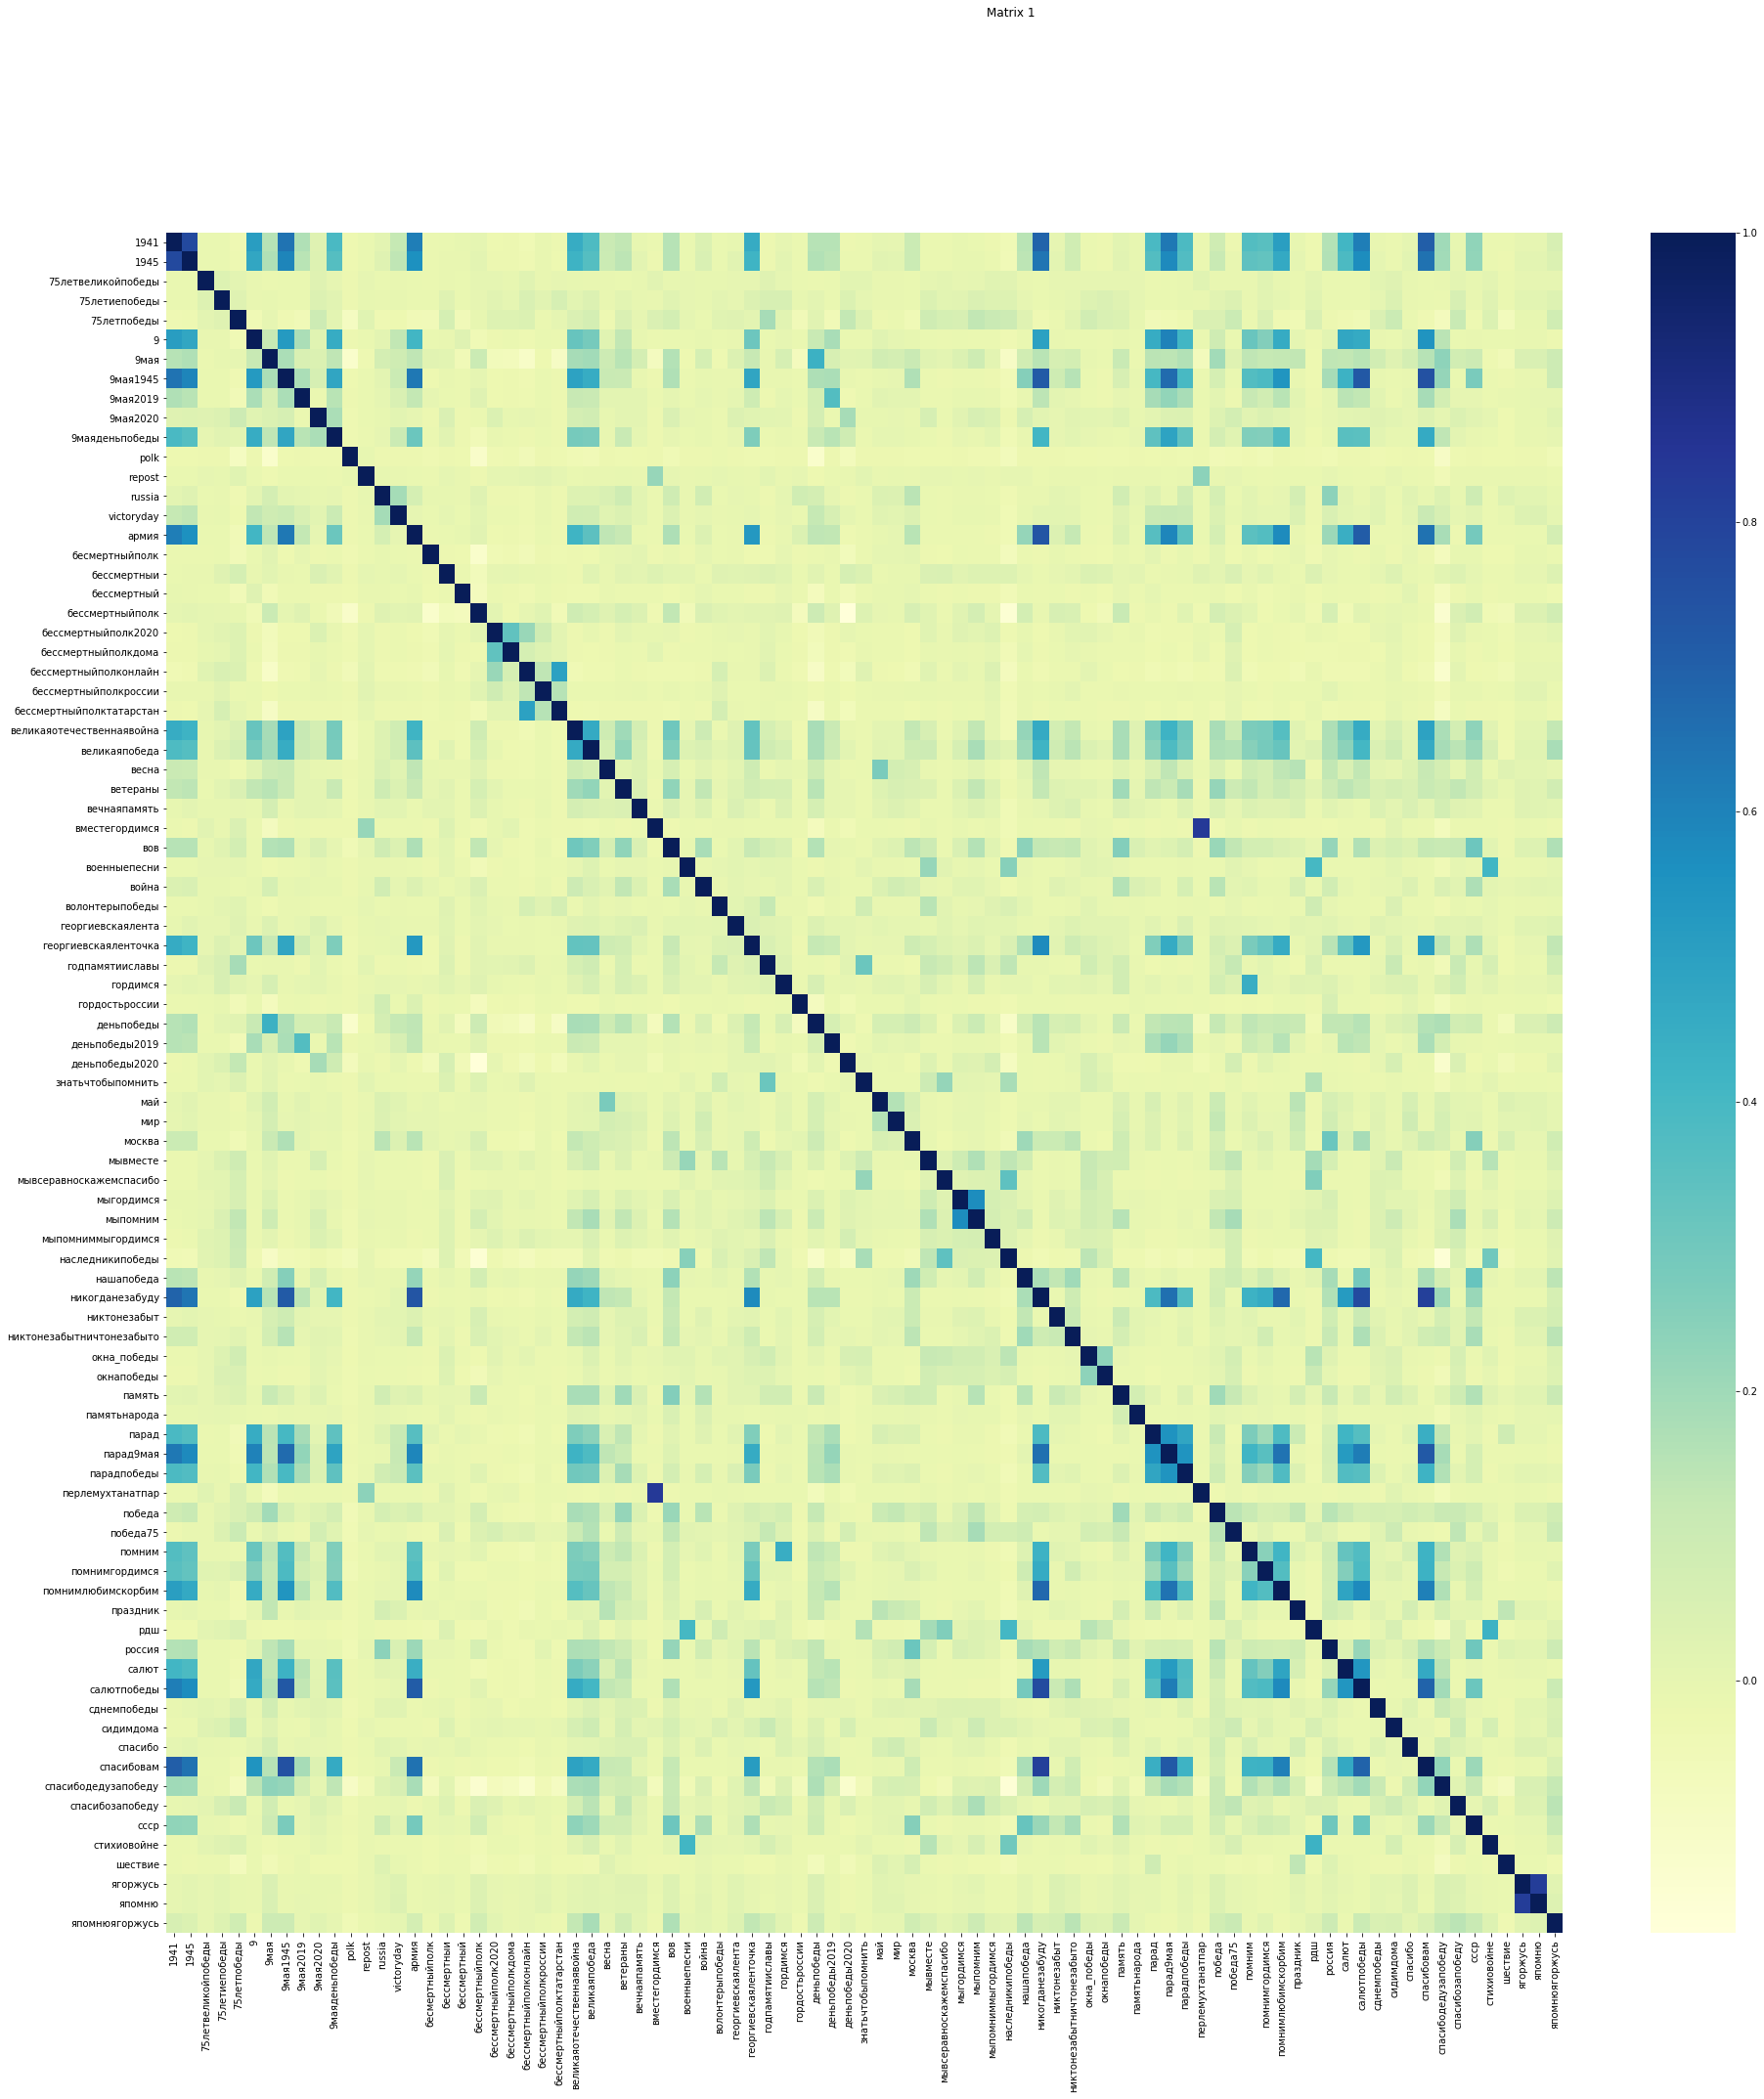

In [195]:
plt.figure(figsize=(l, l))
plt.suptitle('Matrix 1')

sns.heatmap(corr, cmap='YlGnBu')

# Анализ постов Instagram. Часть 4 – Анализ временных рядов

В качестве набора данных используется датасет, выгруженный в период с апреля по май 2020, по выявленному набору хештегов на тему акции «Бессметрный полк».    

In [55]:
from tqdm import tqdm_notebook

Переведем поле `published` в тип `datetime64`.

In [131]:
df.published = pd.to_datetime(df.published)

## Общее распределение постов

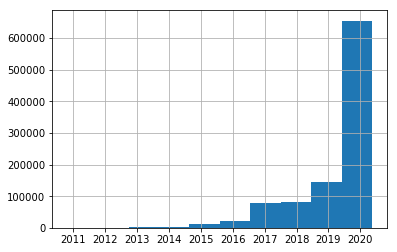

In [57]:
df.published.hist()

## Распределение по месяцам
Май ожидаемо самый активный.

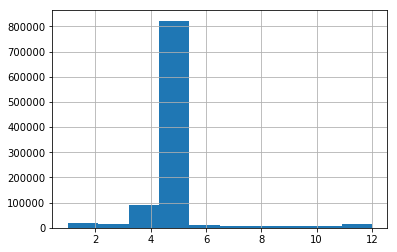

In [58]:
df.published.dt.month.hist()

Можно исключить май, для более получения более точного представления о годовом распределении постов.

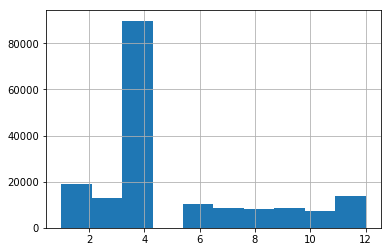

In [59]:
df[df.published.dt.month != 5].published.dt.month.hist()

## Распределение по дням мая
Построим диаграмму распределения постов в зависимости от дня мая (с 1 по 31). 

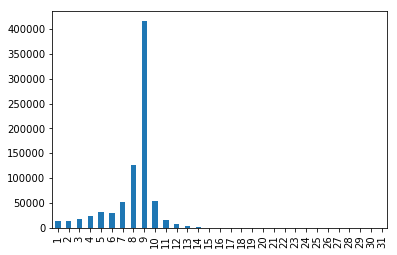

In [60]:
df[df.published.dt.month == 5].published.dt.day.value_counts().sort_index().plot(kind='bar')

## Первое упоминание тега
Для всех популярных тегов найдем дату его первого упоминания. 

In [127]:
sort_df = df.sort_values(by='published', ascending=True, inplace=False)

In [61]:
flattened_tags_df = pd.DataFrame(flattened_tags_counts, columns=['count'])
flattened_tags_df['first_mention'] = np.nan

sort_df = df.sort_values(by='published', ascending=True, inplace=False)

In [62]:
flattened_tags_df.head()

,count,first_mention
деньпобеды,329698,NaN
9мая,318154,NaN
бессмертныйполк,287698,NaN
спасибодедузапобеду,234897,NaN
75летпобеды,180856,NaN


In [69]:
for tag in tqdm_notebook(flattened_tags_df[flattened_tags_df.first_mention.isna()].index):
    flattened_tags_df.at[tag, 'first_mention'] = sort_df[sort_df.tags.apply(lambda x: tag in x)].published[0]

KeyboardInterrupt: 

По диаграмме распределения видно, что многие теги были «введены» в 2015, однако есть и позже.

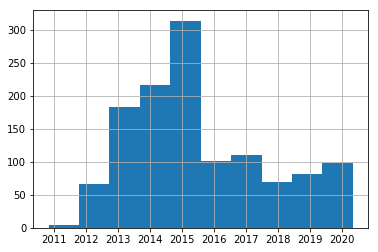

In [70]:
pd.to_datetime(flattened_tags_df.first_mention).hist()

Посмтроим диаграмму появлнеия 100 самых популярных тегов.

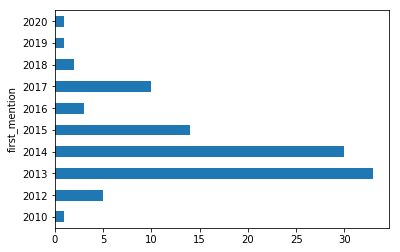

In [86]:
flattened_tags_df[:100].first_mention.groupby(flattened_tags_df[:100].first_mention.dt.year).count().plot(kind='barh')

In [96]:
# теги из топ-100, появившиеся в Inst после 2016 года 
flattened_tags_df[:100][flattened_tags_df[:100].first_mention.dt.year >= 2016].sort_values('first_mention', ascending=False)

,count,first_mention
литературапобеды,8198,2020-01-24 10:26:03+00:00
мывсеравноскажемспасибо,21484,2019-05-08 09:28:29+00:00
окна_победы,17916,2018-05-09 00:51:44+00:00
окнапобеды,29774,2018-05-09 00:51:44+00:00
сидимдома,22125,2017-05-09 16:09:53+00:00
75летвеликойпобеды,10544,2017-05-09 08:04:14+00:00
годпамятииславы,29118,2017-05-09 08:04:14+00:00
вместегордимся,15712,2017-05-09 04:47:17+00:00
перлемухтанатпар,11388,2017-05-09 04:47:17+00:00
75словпобеды,8164,2017-05-08 08:57:55+00:00


Как видно, в 2020 году появился только один тег: `литературапобеды`, в 2019 тоже один: `мывсеравноскажемспасибо`. Тег `сидимдома` был впервые в 2017 году (а не 2020). Все теги о 75-лети были введены ещё в 2017 году. 

Рассмотрим тег сидимдома на конкретных постах 2017 года.

In [129]:
pd.set_option('display.max_colwidth', -1)
sort_df[sort_df.tags.apply(lambda x: 'сидимдома' in x)].post_url[:10]

id
1511007848866459684    https://www.instagram.com/p/BT4LaIEgzAk/
1926301044393045212    https://www.instagram.com/p/Bq7mJgJguzc/
1926301287662598474    https://www.instagram.com/p/Bq7mNCtgblK/
1926305858799571291    https://www.instagram.com/p/Bq7nPj6gJFb/
1929651733408137223    https://www.instagram.com/p/BrHgAceAkAH/
2038079090646475076    https://www.instagram.com/p/BxItiJ-ImFE/
2038410013245377995    https://www.instagram.com/p/BxJ4xtqFw3L/
2039982712543886420    https://www.instagram.com/p/BxPeXgBHbxU/
2040749875860933781    https://www.instagram.com/p/BxSMzMiHQyV/
2041670419817114224    https://www.instagram.com/p/BxVeG35nypw/
Name: post_url, dtype: object

«Сидим дома» никак не связано с пандемией... 

In [ ]:
# Распределение по месяцам без апреля и мая. 

In [ ]:
df[(df.published.dt.month != 5) & (df.published.dt.month != 4)].published.dt.month.hist()

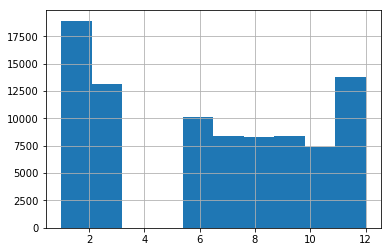

In [132]:
df[(df.published.dt.month != 5) & (df.published.dt.month != 4)].published.dt.month.hist()

In [ ]:
df[(df.published.dt.month != 5) & (df.published.dt.month != 4)].published.dt.month.hist()

## Один тег — одна строчка
Сделаем датасет в котором каждая строка – это один хеш тег и его матеданные (дата публикации, лайки, комментарии и др.)  

In [177]:
all_tags_df = df[:20000].tags.apply(pd.Series) \
    .merge(df[:20000], right_index = True, left_index = True) \
    .drop(['tags'], axis = 1) \
    .melt(id_vars = ['post_url', 'display_url', 'caption', 'published', 'likes_count', 'comments_count'], value_name = 'tag') \
    .drop('variable', axis = 1) \
    .dropna()

In [178]:
all_tags_df.shape

(116045, 7)

In [180]:
# all_tags_df.groupby(['tag']).agg(lambda x:x.value_counts().index[0])

KeyboardInterrupt: 

In [210]:
flattened_tags_counts[flattened_tags_counts.values > 500]

деньпобеды                   329698
9мая                         318154
бессмертныйполк              287698
спасибодедузапобеду          234897
75летпобеды                  180856
деньпобеды2020               120742
наследникипобеды             104354
бессмертныйполконлайн        81408 
победа                       72720 
великаяпобеда                66042 
япомнюягоржусь               60321 
помнимгордимся               54572 
вов                          52360 
великаяотечественнаявойна    48674 
россия                       43225 
победа75                     41975 
бессмертныйполк2020          39874 
рдш                          37645 
помним                       37174 
бесмертныйполк               36649 
мыпомним                     36347 
сднемпобеды                  32589 
бессмертныйполкдома          32257 
мыпомниммыгордимся           31984 
память                       31345 
ветераны                     31227 
спасибозапобеду              30250 
окнапобеды                  

In [221]:
df_['owner_id'].value_counts()[:10].index

Float64Index([ 4799010861.0,  3236360707.0,  2660996976.0, 34122567701.0,
               2812159600.0,  1269359150.0, 34339995658.0,  4524403212.0,
               8099859454.0, 34143593859.0,
              ...
                349923907.0,  4628719549.0,   394007564.0, 32912933194.0,
              25139505324.0,   782198271.0,  5503106222.0,   415800848.0,
                291209801.0,          10.0],
             dtype='float64', length=126960)

In [224]:
df_[df_.owner_id == 34122567701.0]

,owner_id,shortcode,post_url,display_url,published,caption,likes_count,comments_count,comments,location,is_video,video_view_count,inst_caption,query,note,created_at,status,tags
id,,,,,,,,,,,,,,,,,,
2298417718849795998,3.412257e+10,B_lnrzdgXee,https://www.instagram.com/p/B_lnrzdgXee/,https://instagram.fhel5-1.fna.fbcdn.net/v/t51.2885-15/e35/94718436_883701972152217_6518864570189440994_n.jpg?_nc_ht=instagram.fhel5-1.fna.fbcdn.net&_nc_cat=109&_nc_ohc=n0u1WGY_PnkAX-LB92g&oh=d1d642d8f3931bfa55094c1c1d7f8d2e&oe=5EE2AC61,2020-04-30 02:12:45+00,"Казахстан внес немалый вклад в общую Победу, и никакой коронавирус не помешает нам отпраздновать великий День Победы и отдать дань уважения нашим героям: ветеранам войны и труженикам тыла.\n\n#победа75\n#бессмертныйполк\n#ұлыжеңіскүнімен\n#нашапобеда\n#9мамырпавлодар\n#мәңгілікдаңқ\n#9мая \n#жеңіскүні\n#1941_1945\n#деньпобеды \n#75летпобеды \n#великаяпобеда \n#победа\n#вов\n#памятьбессмертна\n#мывместе \n#память \n#мыпомним\n#творимдобро \n#великаяотечественнаявойна\n#75лет_победы\n#9мая2020\n#9маяденьвеликойпобеды\n#9маяпавлодар #павлодар\n#pavlodar #pavlodarcity #pavlodarregion #pavlodarnews #bessmertnyi_polk_pavlodar",48,6,NaN,NaN,false,NaN,Photo by Бессмертный полк Павлодара. in Pavlodar. Image may contain: 1 person,#бессмертныйполк,NaN,2020-05-12 02:17:56.442423+00,true,"{победа75,бессмертныйполк,ұлыжеңіскүнімен,нашапобеда,9мамырпавлодар,мәңгілікдаңқ,9мая,жеңіскүні,1941_1945,деньпобеды,75летпобеды,великаяпобеда,победа,вов,памятьбессмертна,мывместе,память,мыпомним,творимдобро,великаяотечественнаявойна,75лет_победы,9мая2020,9маяденьвеликойпобеды,9маяпавлодар,павлодар,pavlodar,pavlodarcity,pavlodarregion,pavlodarnews,bessmertnyi_polk_pavlodar}"
2298417979987109100,3.412257e+10,B_lnvmqgKTs,https://www.instagram.com/p/B_lnvmqgKTs/,https://instagram.fhel5-1.fna.fbcdn.net/v/t51.2885-15/e35/95438471_1220315021647581_8322500629397147023_n.jpg?_nc_ht=instagram.fhel5-1.fna.fbcdn.net&_nc_cat=109&_nc_ohc=4fE396WsmiIAX-izQ6E&oh=a12a60ba4dff23e78ebca0f7abefa7c7&oe=5EE43E3F,2020-04-30 02:13:16+00,"Казахстан внес немалый вклад в общую Победу, и никакой коронавирус не помешает нам отпраздновать великий День Победы и отдать дань уважения нашим героям: ветеранам войны и труженикам тыла.\n\n#победа75\n#бессмертныйполк\n#ұлыжеңіскүнімен\n#нашапобеда\n#9мамырпавлодар\n#мәңгілікдаңқ\n#9мая \n#жеңіскүні\n#1941_1945\n#деньпобеды \n#75летпобеды \n#великаяпобеда \n#победа\n#вов\n#памятьбессмертна\n#мывместе \n#память \n#мыпомним\n#творимдобро \n#великаяотечественнаявойна\n#75лет_победы\n#9мая2020\n#9маяденьвеликойпобеды\n#9маяпавлодар #павлодар\n#pavlodar #pavlodarcity #pavlodarregion #pavlodarnews #bessmertnyi_polk_pavlodar",32,0,NaN,NaN,false,NaN,"Photo by Бессмертный полк Павлодара. in Казахстан, Павлодар. Image may contain: 1 person, text",#бессмертныйполк,NaN,2020-05-12 02:17:56.440524+00,true,"{победа75,бессмертныйполк,ұлыжеңіскүнімен,нашапобеда,9мамырпавлодар,мәңгілікдаңқ,9мая,жеңіскүні,1941_1945,деньпобеды,75летпобеды,великаяпобеда,победа,вов,памятьбессмертна,мывместе,память,мыпомним,творимдобро,великаяотечественнаявойна,75лет_победы,9мая2020,9маяденьвеликойпобеды,9маяпавлодар,павлодар,pavlodar,pavlodarcity,pavlodarregion,pavlodarnews,bessmertnyi_polk_pavlodar}"
2298418216084619633,3.412257e+10,B_lnzCjAsFx,https://www.instagram.com/p/B_lnzCjAsFx/,https://instagram.fhel5-1.fna.fbcdn.net/v/t51.2885-15/e35/95009260_1475266399326785_9121016442164644226_n.jpg?_nc_ht=instagram.fhel5-1.fna.fbcdn.net&_nc_cat=105&_nc_ohc=1HS0YM_TALgAX_8egcV&oh=d975a4988ecb65ccebe89bef4bf5bd3d&oe=5EE298AD,2020-04-30 02:13:44+00,"Казахстан внес немалый вклад в общую Победу, и никакой коронавирус не помешает нам отпраздновать великий День Победы и отдать дань уважения нашим героям: ветеранам войны и труженикам тыла.\n\n#победа75\n#бессмертныйполк\n#ұлыжеңіскүнімен\n#нашапобеда\n#9мамырпавлодар\n#мәңгілікдаңқ\n#9мая \n#жеңіскүні\n#1941_1945\n#деньпобеды \n#75летпобеды \n#великаяпобеда \n#победа\n#вов\n#памятьбессмертна\n#мывместе \n#памя